# Cтандартизация признаков при работе с линейными моделями

Введение
Линейные алгоритмы — распространенный класс моделей, которые отличается своей простотой и скоростью работы. Их можно обучать за разумное время на очень больших объемах данных, и при этом они могут работать с любыми типами признаков — вещественными, категориальными, разреженными. В этом задании мы предлагаем вам воспользоваться персептроном — одним из простейших вариантов линейных моделей.

Как и в случае с метрическими методами, качество линейных алгоритмов зависит от некоторых свойств данных. В частности, признаки должны быть нормализованы, то есть иметь одинаковый масштаб. Если это не так, и масштаб одного признака сильно превосходит масштаб других, то качество может резко упасть.

Один из способов нормализации заключается в стандартизации признаков. Для этого берется набор значений признака на всех объектах, вычисляется их среднее значение и стандартное отклонение. После этого из всех значений признака вычитается среднее, и затем полученная разность делится на стандартное отклонение.

Для стандартизации признаков удобно воспользоваться классом sklearn.preprocessing.StandardScaler. Функция fit_transform данного класса находит параметры нормализации (средние и дисперсии каждого признака) по выборке, и сразу же делает нормализацию выборки с использованием этих параметров. Функция transform делает нормализацию на основе уже найденных параметров.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [7]:
data_train = pd.read_csv('perceptron-train.csv', header=None)
data_test = pd.read_csv('perceptron-test.csv', header=None)
data_train.head()

,0,1,2
0,-1.0,-0.024626,1174.600238
1,1.0,-0.978058,1083.198803
2,-1.0,0.314272,-1472.977609
3,-1.0,0.179752,231.017267
4,1.0,-1.262544,-778.271726


In [49]:
data_train.columns

Int64Index([0, 1, 2], dtype='int64')

In [50]:
X_train = data_train.drop(data_train.columns[0],axis=1)
y_train = data_train[data_train.columns[0]]
X_test = data_test.drop(data_test.columns[0],axis=1)
y_test = data_test[data_test.columns[0]]

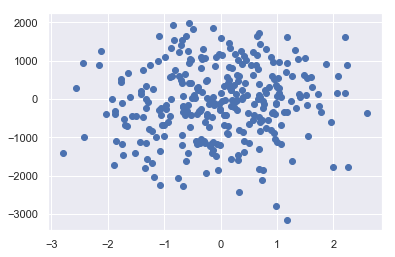

In [51]:
plt.plot(X_train[X_train.columns[0]], X_train[X_train.columns[1]], 'o')

In [52]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
clf = Perceptron(random_state=241)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
score = accuracy_score(y_test,predictions)
print score

0.655


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
clf.fit(X_train_scaled, y_train)
predictions_scaled = clf.predict(X_test_scaled)
score_scaled = accuracy_score(y_test,predictions_scaled)
print score_scaled

0.845


In [55]:
delta = np.round(score_scaled-score,3)
f = open('delta.txt', 'w')
f.write(str(delta))
f.close()